# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5 (делал все)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Конечно же я выпишу градиент подсмотрев в семинар:
$$
    dQ = \dfrac{1}{\ell} d(\left(y - Xw \right)^T) \left( y - Xw \right) + \dfrac{1}{\ell} \left(y - Xw \right)^T d(\left( y - Xw \right))
$$

$$
    dQ = \dfrac{1}{\ell} \left(-Xdw \right)^T \left( y - Xw \right) + \dfrac{1}{\ell} \left(y - Xw \right)^T \left(-X\right) dw
$$
Пользуясь свойствами скаляров, получаем:

$$
    dQ = \dfrac{1}{\ell} \left(y - Xw \right)^T \left(-X\right)dw + \dfrac{1}{\ell} \left(y - Xw \right)^T \left(-X\right)dw = -\dfrac{2}{\ell} \left(y - Xw \right)^T Xdw
$$

$$
\nabla^T_w Q(w) = -\dfrac{2}{\ell} \left(y - Xw \right)^T X
$$

$$
\nabla_w Q(w) = -\dfrac{2}{\ell} X^T \left(y - Xw \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

В коде я немного использовал GPT. Он мне нужен был, когда я отчаялся и не мог понять, почему я все время получаю неправильный ответ. Я просто попросил его реализовать спуск методом Adam и увидел, что в решении все очень похоже, но только он делает итерацию += 1 (у меня в коде это self.iteration += 1). Потом я спросил, для чего это нужно и оказалось, что это вроде как коррекция смещения на начальных шагах. В общем, строчка self.iteration += 1 взята из GPT, а до этого я минут 40 ломал голову и не понимал, в чем проблема. Кстати, я пытался вместо повышения итерации возводить в степень итерации + 1, но это почему-то не помогало

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/123626648/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/123626732/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/123626814/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/123661159/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/123688586/

(никнейм: ommirzoev@edu.hse.ru)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

''

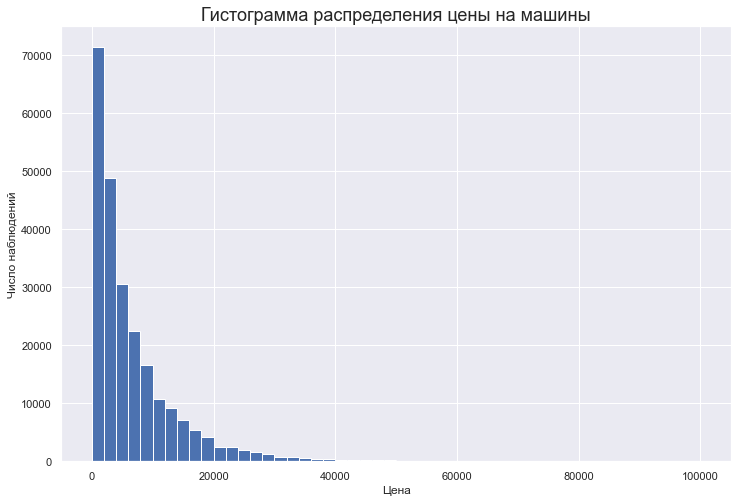

In [9]:
plt.figure(figsize = (12, 8))
plt.hist(data['price'], bins = 50)
plt.title('Гистограмма распределения цены на машины', fontsize = 18)
plt.xlabel('Цена')
plt.ylabel('Число наблюдений')
;

''

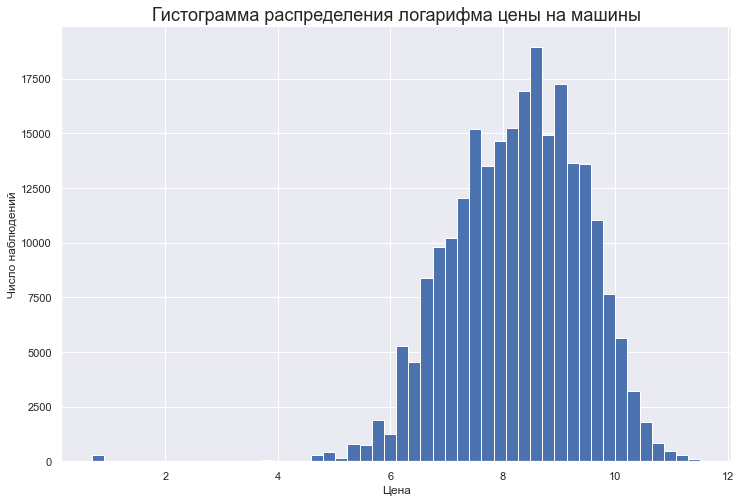

In [10]:
plt.figure(figsize = (12, 8))
plt.hist(np.log1p(data['price']), bins = 50)
plt.title('Гистограмма распределения логарифма цены на машины', fontsize = 18)
plt.xlabel('Цена')
plt.ylabel('Число наблюдений')
;

Как мы видим, распределение таргета похоже на экспоненциальное, в данных большое количество машин с маленькой ценой. После логарифмирования распределение стало более похожим на нормальное, огромный хвост пропал. В целом я думаю будет полезно логарифмировать таргет в силу указанных свойств. Кроме того, насколько я знаю логарифмирование - это почти всегда хорошо, особенно если в данных есть сильные перекосы, выбросы и т.д.

In [11]:
# логарифмируем цены
data['log_price'] = np.log1p(data['price'])
data.drop(columns = 'price', inplace = True)

Можно заметить, что в таргете все равно есть выбросы. Воспользуемся интерквартильным размахом для того, чтобы очистить их:

In [12]:
# напишем функцию для очистки выбросов, которая потом еще пригодится
def IQR_clean(column):
    global data
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lim_right = q3 + 1.5 * iqr
    lim_left = q1 - 1.5 * iqr
    data = data[(data[column] <= lim_right) & (data[column] >= lim_left)]
IQR_clean('log_price')

In [13]:
# смотрим на типы столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240399 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              240399 non-null  object 
 1   model              240399 non-null  object 
 2   vehicleType        240399 non-null  object 
 3   gearbox            240399 non-null  object 
 4   fuelType           240399 non-null  object 
 5   notRepairedDamage  240399 non-null  object 
 6   powerPS            240399 non-null  int64  
 7   kilometer          240399 non-null  int64  
 8   autoAgeMonths      240399 non-null  int64  
 9   log_price          240399 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 20.2+ MB


У нас есть две бинарные переменные с типом object. Преобразуем их в 0 и 1:

In [14]:
data['gearbox'] = (data['gearbox'] == 'manuell') * 1
data['notRepairedDamage'] = (data['notRepairedDamage'] == 'ja') * 1

Теперь надо проанализировать признаки. Сначала построим графики распределения для всех признаков

In [15]:
features = data.columns

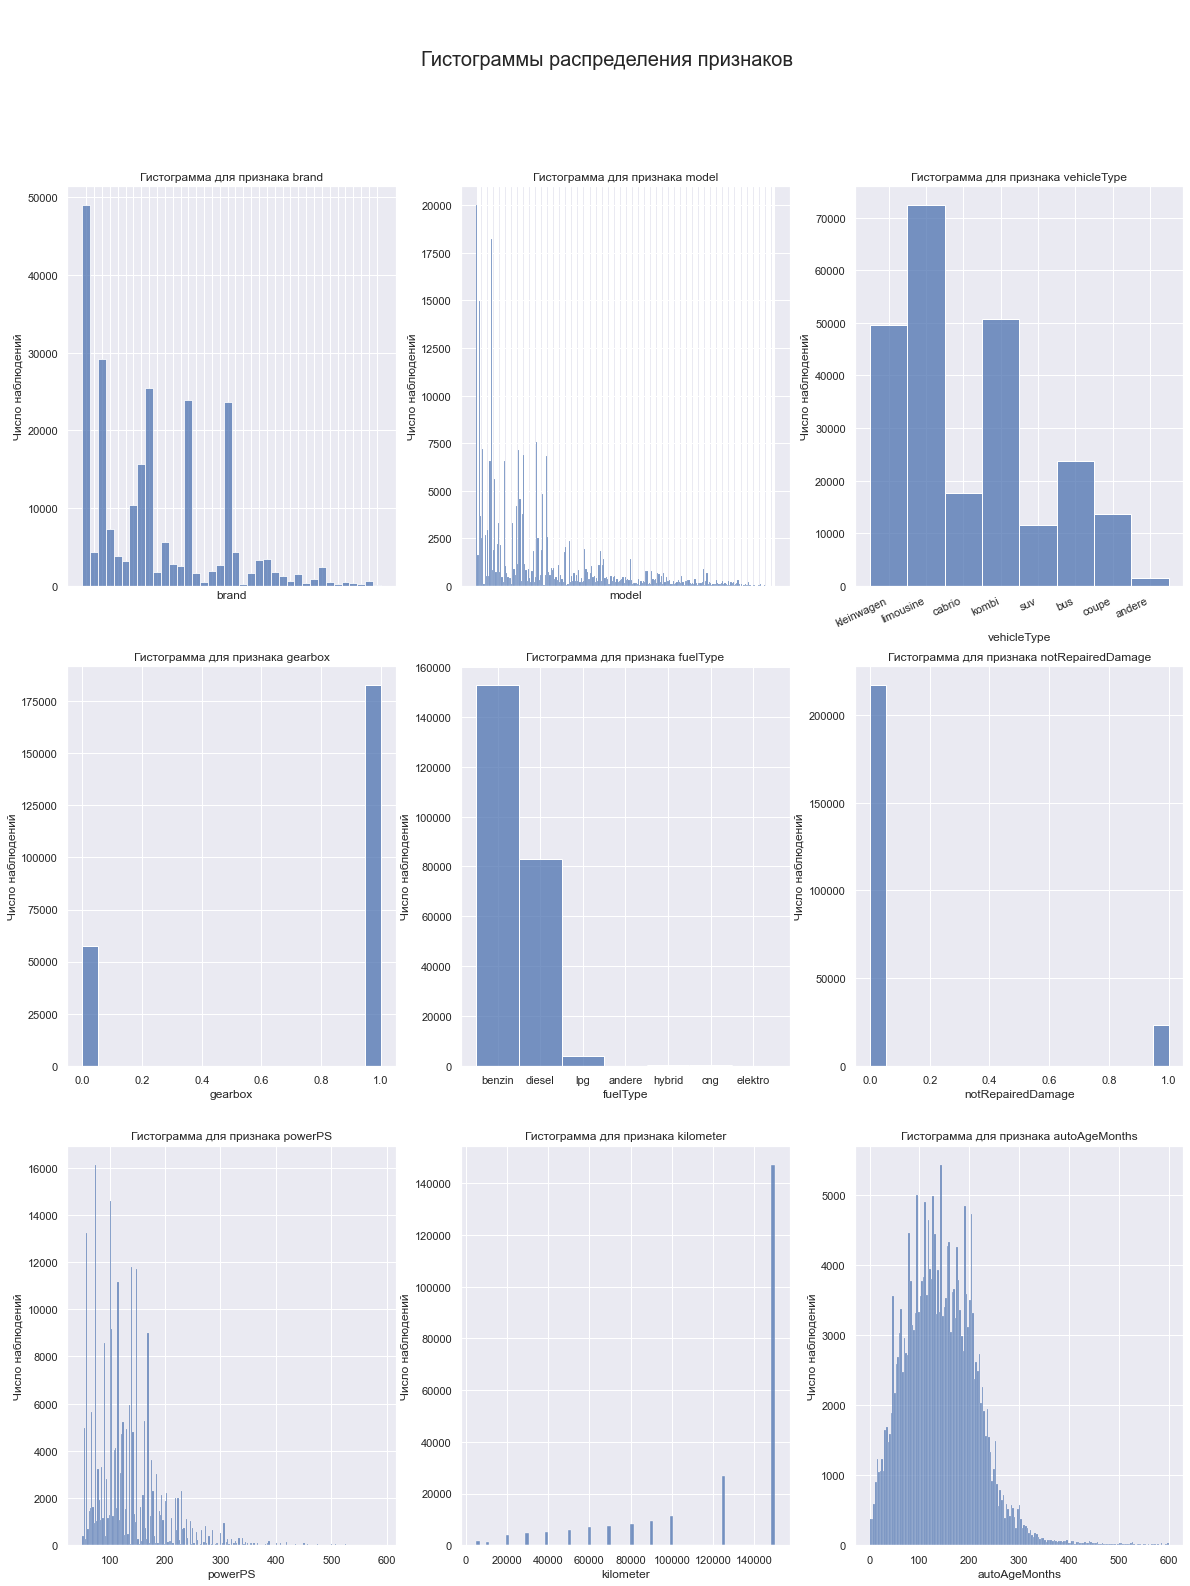

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(20,25))
features = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType',
       'notRepairedDamage', 'powerPS', 'kilometer', 'autoAgeMonths']

for i in range(len(features)):
    sns.histplot(x = data[features[i]], ax = axes[i // 3, i % 3]).set(
    title = 'Гистограмма для признака ' + features [i],
    xlabel = features [i],
    ylabel = 'Число наблюдений')
    
    if (i == 0) or (i == 1): # нужно для читаемости графиков
        plt.setp(axes[i // 3, i % 3].get_xticklabels(), visible=False)
        
plt.setp(axes[0, 2].get_xticklabels(), rotation=25, ha='right') # тоже для читаемости

fig.suptitle('\n\nГистограммы распределения признаков', fontsize=20);

Теперь графики зависимости целевой переменной от признака

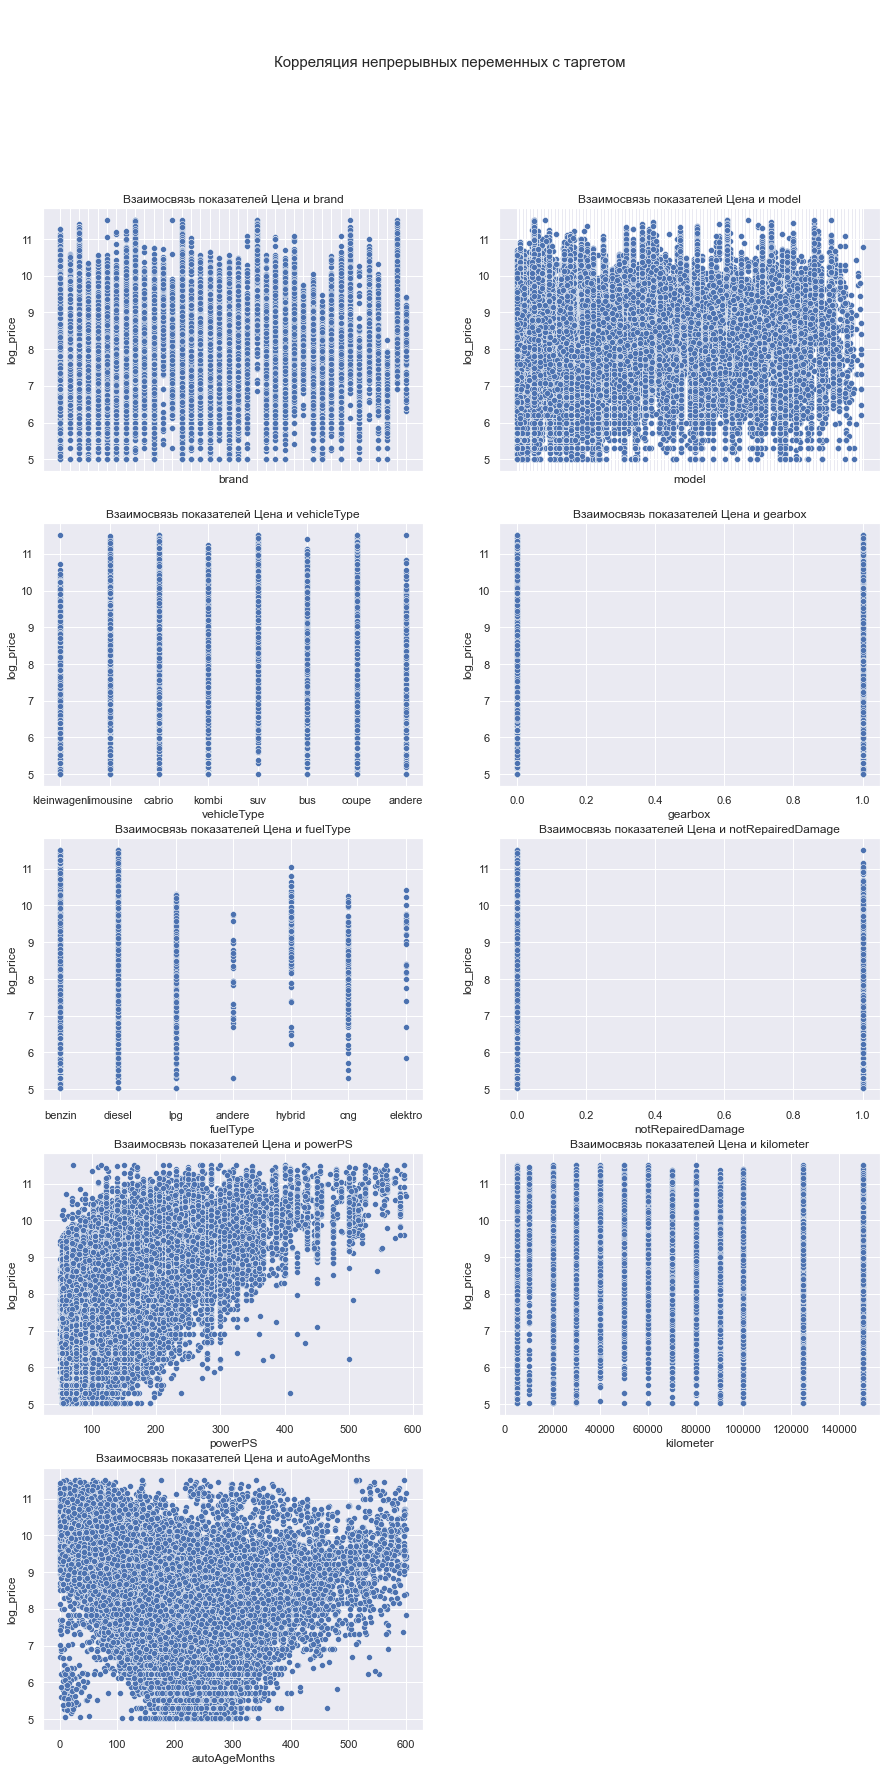

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(15, 28))

for i in range(len(features)):
    sns.scatterplot(x = features[i], y = 'log_price', data = data, ax = axes[i // 2, i % 2]).set(
        title = 'Взаимосвязь показателей Цена и ' + (features)[i])
    
    if (i == 0) or (i == 1): # нужно для читаемости графиков
        plt.setp(axes[i // 2, i % 2].get_xticklabels(), visible=False)
        
axes[4, 1].axis('off')
fig.suptitle('\n\n\n Корреляция непрерывных переменных с таргетом', fontsize=15);

Из полезных признаков я бы наверное выделил все числовые, так как можно заметить их взаимосвязь с таргетом. Например чем больше мощность двигателя, тем выше и цена. Также можно заметить что для машин с пробегом 40-60 тыс. цена начинается от более высоких значений. Возможно, потому что таких машин больше в обороте (их легче продать, когда пробег не слишком маленький и не слишком большой). Даже признак с возрастом автомобиля является полезным, хотя по облаку точек на первый взгляд и не скажешь, но если его увеличить:

''

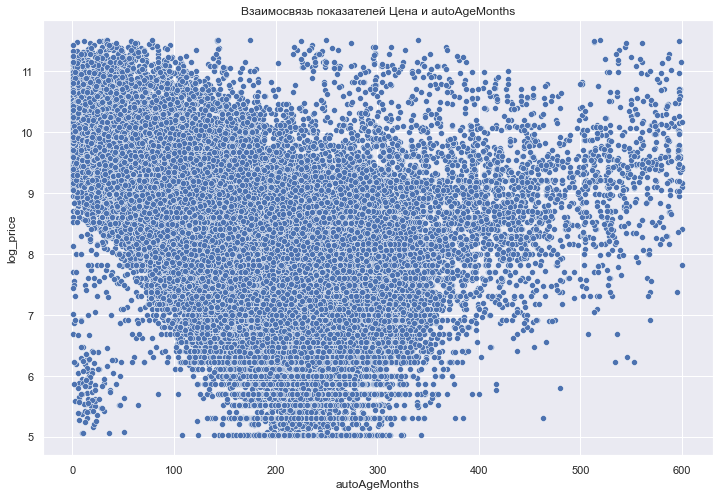

In [18]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'autoAgeMonths', y = 'log_price', data = data).set(
        title = 'Взаимосвязь показателей Цена и autoAgeMonths')
;

То можно увидеть четкое убывание до 300, а точек справа, по которым цена возрастает, намного меньше. Кстати, возможно если мы добавим квадрат признака, то зависимость отразилась бы лучше. Если нам надо будет повысить качество, можно будет сделать это.

Что касается бинарных признаков, тут все выглядит не очень. Нельзя сказать, что для какой-то коробки передач или машины с неисправностью цена выше или ниже. Давайте посчитаем их корреляцию с таргетом:

In [19]:
columns = ['gearbox', 'notRepairedDamage', 'log_price']
data[columns].corr()

,gearbox,notRepairedDamage,log_price
gearbox,1.000000,0.032993,-0.305440
notRepairedDamage,0.032993,1.000000,-0.303018
log_price,-0.305440,-0.303018,1.000000


Если обратиться к картинкам с гугла, то корреляция по модулю > 0.3 это умеренная связь. То есть эти признаки прям на грани. Я бы их все-таки оставил, так как нам не из чего выбирать, признаков и так маловато.

Теперь рассмотрим категориальные признаки:

Среди них хорошо выделяются вид топлива и бренд автомобиля. Можно заметить для определенных категорий более высокую или более низкую цену. А вот тип автомобиля я бы назвал слабым признаком: для всех категорий ценовой диапазон практически идентичный. Возможно признак хорошо бы сработал в паре с каким-то другим, но это наверное больше про деревья, а не линейную регрессию. В общем я бы этот признак не стал использовать. 

Остается модель автомобиля. В принципе здесь тоже есть какие-то закономерности. Меня немного смущает то, что у нас получится много категорий, но так уж и быть, оставим его

Теперь обработаем выбросы для числовых признаков:

In [20]:
columns = ['autoAgeMonths', 'powerPS', 'kilometer']
for el in columns:
    IQR_clean(el)

Для бинарных и категориальных признаков выбросы лучше не чистить а объединять в одну категорию. Тут мы плавно переходим к пункту про трансформации. Судя по гистограммам, кроме числовых признаков, категории с небольшим числом наблюдений есть в признаках fuelType, model и  brand:

In [21]:
data['fuelType'].value_counts() 

benzin     139623
diesel      79521
lpg          3271
cng           417
hybrid        161
andere         29
elektro        18
Name: fuelType, dtype: int64

Давайте объединим гибридные машины и электрокары (все-таки определенные сходства между ними есть, в любом гибриде есть электро-двигатель) и отнесем их к категории другое (andere):

In [22]:
data.loc[data['fuelType'].isin(['elektro', 'hybrid']), 'fuelType'] = 'andere'

In [23]:
data['brand'].value_counts().values.min()

96

На самом деле я бы не сказал, что в признаке бренд нужно что-то объединять. Категории представлены достаточно хорошо, а минимальное число наблюдений - 96. Так что тут все норм.

In [24]:
# последние 20 категорий по числу наблюдений
least_20 = data['model'].value_counts().reset_index().tail(20)
least_20['model'].values

array([30, 27, 26, 25, 21, 21, 17, 15, 12, 10, 10,  9,  9,  6,  5,  4,  4,
        3,  2,  2])

Довольно много категорий с очень маленьким числом наблюдений. Ну давайте что ли сделаем так: пусть в каждой из категорий будет хотя бы 30 наблюдений

In [25]:
data.loc[data['model'].isin(least_20['index'].values), 'model'] = 'other'

Ну вот и все, на этом трансформации в принципе заканчиваются. Остается, конечно, отмасштабировать числовые признаки и закодировать категориальные

In [26]:
categorical = ['brand', 'model', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage'] 

# YOUR CODE (EDA):

In [27]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [29]:
x 

<223040x276 sparse matrix of type '<class 'numpy.float64'>'
	with 1757888 stored elements in Compressed Sparse Row format>

После трансформации х стал какой-то неприкольный. Чтобы решить проблему я обратился к своему лучшему другу GPT. Промпт: просто ввел код с трансформацией и написал как мне сделать x снова датафреймом?

In [30]:
# Получение имен колонок
ohe_cols = column_transformer.named_transformers_['ohe'].get_feature_names_out(categorical)
scaled_cols = numeric
other_cols = other

# Объединение всех имен колонок
all_columns = list(ohe_cols) + scaled_cols + other_cols

# Создание DataFrame
x = pd.DataFrame(x.toarray(), columns=all_columns)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size = 0.2, random_state = 77)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 77)

In [32]:
print(X_train.shape[0] / data.shape[0], X_val.shape[0] / data.shape[0], X_test.shape[0] / data.shape[0])
# вроде получилось правильно разбить

0.8 0.1 0.1


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [33]:
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter('ignore')


In [35]:
grid = np.logspace(-3, 0, 15) # решетка по которой перебираем лямбду
descents = ['full', 'stochastic', 'momentum', 'adam']
num_steps = []          # сюда будем записывать, сколько шагов сделали до сходимости
error_train = []        # ошибки на трейне
error_test = []         # ошибки на тесте
r_squared = []          # R^2
best_lambdas = []

In [36]:
dimension = X_val.shape[1]
for descent in descents:
    losses = [] # для каждого спуска создаем список ошибок
    for lambda_ in grid:
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_
            }
        }

        regression = LinearRegression(descent_config = descent_config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
        losses.append(current_loss)
        
    best_loss = min(losses) # находим минимальный лосс
    best_lambda = grid[np.array(losses).argmin()] # находим лямбду, которая соответствует минимальному лоссу
    best_lambdas.append(best_lambda)
    
    # теперь снова обучаем регрессию с лучшей лямбдой
    config = {
        'descent_name': descent,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    error_train.append(regression.calc_loss(X_train.to_numpy(), y_train.to_numpy()))
    error_test.append(regression.calc_loss(X_test.to_numpy(), y_test.to_numpy()))
    num_steps.append(len(regression.loss_history) - 1) # минус 1 так как мы считаем лосс и после поледней итерации
    
    y_pred = regression.predict(X_test.to_numpy())
    r_squared.append(r2_score(y_test, y_pred))

# грузится 2-2.5 минутки :(

Для каждого вида спуска мы получили результаты:

In [37]:
for i in range(4):
    print(f'Ошибка на трейне для {descents[i]} GD: {error_train[i]}')
    print(f'Ошибка на тесте для {descents[i]} GD: {error_test[i]}')
    print(f'R2 score для {descents[i]} GD: {r_squared[i]}')
    print(f'Число итераций до сходимости для {descents[i]} GD: {num_steps[i]}')
    print('\n')

Ошибка на трейне для full GD: 0.31190721227562507
Ошибка на тесте для full GD: 0.315783947664736
R2 score для full GD: 0.7190624937398192
Число итераций до сходимости для full GD: 68


Ошибка на трейне для stochastic GD: 0.3143471453386082
Ошибка на тесте для stochastic GD: 0.3143623168965819
R2 score для stochastic GD: 0.7203272489808044
Число итераций до сходимости для stochastic GD: 204


Ошибка на трейне для momentum GD: 0.2106296842530644
Ошибка на тесте для momentum GD: 0.2088710267771753
R2 score для momentum GD: 0.8141776812066375
Число итераций до сходимости для momentum GD: 116


Ошибка на трейне для adam GD: 0.19140438648952868
Ошибка на тесте для adam GD: 0.19070075726270816
R2 score для adam GD: 0.8303428797330977
Число итераций до сходимости для adam GD: 223




### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

По сути для графика нам нужен только loss_history, так как каждое его обновление соответствует новой итерации, ну и потом мы получаем финальную ошибку

''

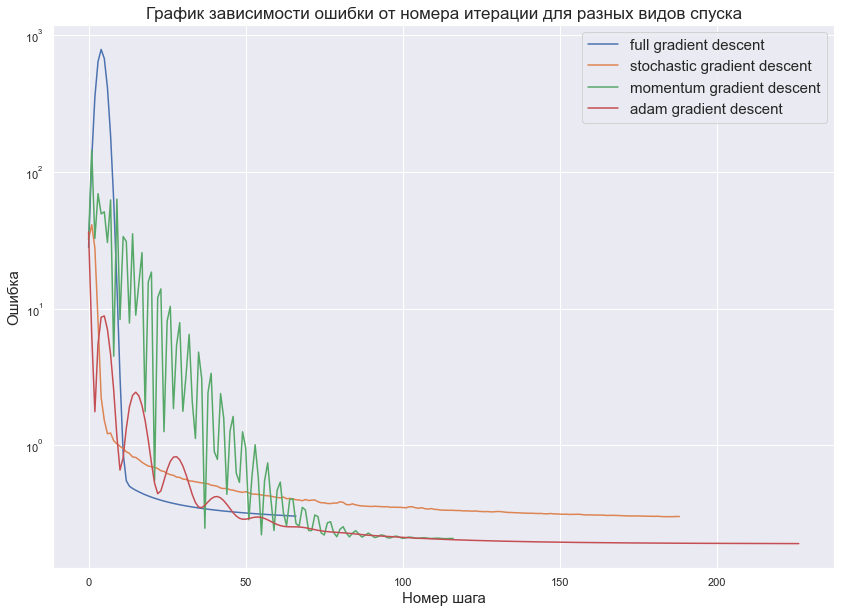

In [38]:
plt.figure(figsize = (14, 10))
for i in range(4):
    descent_config = {
        'descent_name': descents[i],
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambdas[i]
         }
    }
    regression = LinearRegression(descent_config = descent_config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    plt.plot(regression.loss_history, label = descents[i] + ' gradient descent')
    
plt.yscale('log') # иначе на графике ничего не разглядеть
plt.legend(fontsize = 15)
plt.title('График зависимости ошибки от номера итерации для разных видов спуска', fontsize = 17)
plt.xlabel('Номер шага', fontsize = 15)
plt.ylabel('Ошибка', fontsize = 15)
;

Ну чтож начнем обзор на методы градиентного спуска:

*Vanilla Descent*. Ошибка на обычном градиентном спуске в начале возрастает больше чем у остальных, а потом также быстро сходится к нулю. Это связано с тем, что на первых итерациях при большом коэффициенте длины шага мы можем делать сильные шаги совсем не туда, и из-за этого ошибка будет расти до какого-то этапа. Стоит отметить, что по итерациям полный спуск сошелся быстрее всех (но это не значит, что он быстрее сойдется по времени, скорее даже наоборот, так как мы считаем градиент по всей выборке)

*Stochastic Descent*. Стохастический спуск показывает себя сильно получше обычного. Здесь ошибка почти сразу
начинает убывать и по сравнению со всеми остальными методами она делает это наиболее плавно. Однако метод требует большого числа итераций

*Momentum Descent*. Здесь ошибка также довольно быстро начинает убывать, но есть сильные колебания: она то растет, то падает, причем может вырасти с 1 до 100. По числу итераций метод на втором месте после полного спуска.

*Adam Descent*. Метод Adam достигает самой минимальной ошибки. Здесь можно наблюдать такие же колебания, как и в моментуме (разве что они немного другой формы, и не такие сильные). Ну это и не должно быть удивительно, так как Adam отчасти основан на моментуме. Итераций этот метод требует побольше, но и сходится к самой минимальной ошибке. Причем даже если мы возьмем итерацию на которой моментум достиг минимума, ошибка для Adam здесь примерно такая же, даже чуть меньше

Для полной картины конечно стоит учитывать и время сходимости. Тогда уже точно можно будет определить какой метод лучше себя показывает

Что касается метрик качества, то лучшее качество получается при использовании метода Adam. Хуже всего себя показывает обычный спуск (скорее всего потому что мы все-таки не находим ту самую точку в которой градиент по всей выборке близок к нулю, так как мы считаем ошибку на 50 объектах)

Лучший метод наверное стоит выбирать в зависимости от того, что нам важнее: делать мало итераций или достигать самой минимальной ошибки. Я думаю, что предпочтительнее второе, поэтому я бы сказал, что Adam выделяется из всех методов.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [50]:
import time

In [51]:
batch_sizes = np.arange(5, 500, 10)
steps_mean = []         # сюда будем записывать среднее число итераций
times_mean = []          # а сюда среднее время выполнения
for batch in batch_sizes:
    steps = []         # сюда будем записывать число итераций (10 штук для каждого батча)
    times = []          # а сюда время выполнения
    config = {
        'descent_name': 'stochastic',
            'kwargs': {
                 'dimension': dimension,
                 'lambda_': best_lambdas[1], 
                 'batch_size': batch
            }
        }
    
    for i in range(10):
        start = time.time()
        regression = LinearRegression(descent_config = config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        stop = time.time()
        runtime = stop - start
        
        times.append(runtime)
        steps.append(len(regression.loss_history) - 1)
        
    times_mean.append(np.array(times).mean())    
    steps_mean.append(np.array(steps).mean()) 
    
# грузится где-то 7 минут :( 

''

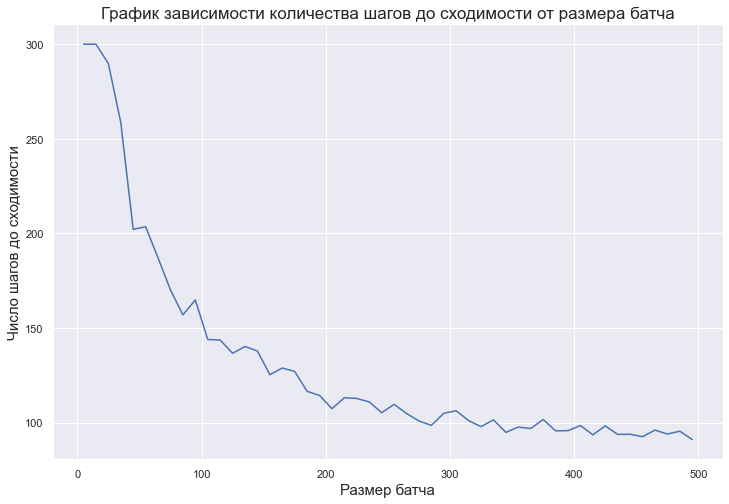

In [55]:
plt.figure(figsize = (12, 8))
plt.plot(batch_sizes, steps_mean)
plt.title('График зависимости количества шагов до сходимости от размера батча', fontsize = 17)
plt.xlabel('Размер батча', fontsize = 15)
plt.ylabel('Число шагов до сходимости', fontsize = 15)
;

''

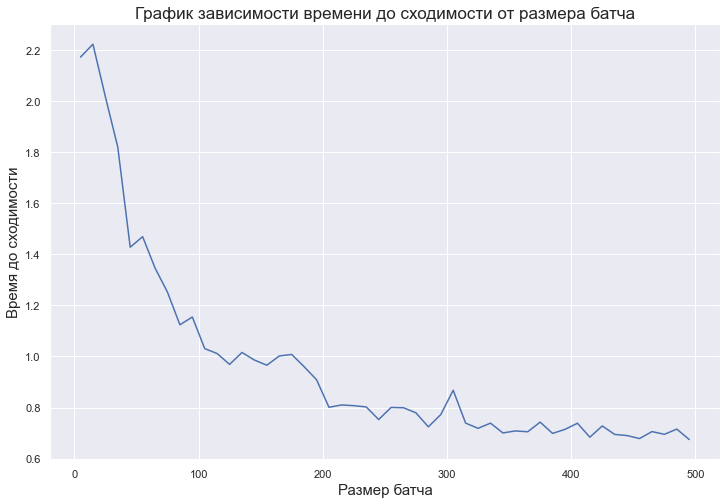

In [57]:
plt.figure(figsize = (12, 8))
plt.plot(batch_sizes, times_mean)
plt.title('График зависимости времени до сходимости от размера батча', fontsize = 17)
plt.xlabel('Размер батча', fontsize = 15)
plt.ylabel('Время до сходимости', fontsize = 15)
;

Мы получили вроде как логичный результат: Чем больше размер батча тем меньше время до сходимости и число итераций, так как градиент, который мы считаем будет все больше и больше похож на настоящий (по всей выборке). Если все же мы хотим выбрать какое-то оптимальное значение и чтобы оно не было слишком большим, то надо выбирать что-то около 80-90, так как до этого момента и время, и число итераций сильно убывают и достигают каких-то адекватных значений. Если же можно брать размер побольше, то стоит взять что-то около 200 - 250, так как после этих значений начинаются колебания и например время до сходимости может даже значительно вырасти

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Посчитаем наш новый градиент:

$$
    dQ= d(\dfrac{1}{\ell} (y - Xw)^T(y - Xw) + \dfrac{\mu}{2} w^Tw)
$$

$$
    dQ = \dfrac{1}{\ell} \left(-Xdw \right)^T \left( y - Xw \right) - \dfrac{1}{\ell} \left(y - Xw \right)^TX dw + \dfrac{\mu}{2} d(w^T)w + \dfrac{\mu}{2} w^Tdw 
$$

$$
    dQ = -\dfrac{1}{\ell} \left(y - Xw \right)^T Xdw - \dfrac{1}{\ell} \left(y - Xw \right)^T Xdw + \mu w^Tdw = (-\dfrac{2}{\ell} \left(y - Xw \right)^T X + \mu w^T)dw
$$

$$
\nabla^T_w Q(w) = -\dfrac{2}{\ell} \left(y - Xw \right)^T X + \mu w^T
$$

$$
\nabla_w Q(w) = -\dfrac{2}{\ell} X^T \left(y - Xw \right) + \mu w
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124040542/

(никнейм: ommirzoev@edu.hse.ru)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [62]:
from tqdm import tqdm

In [64]:
grid = np.logspace(-3, 0, 15) # решетка по которой перебираем лямбду
grid_mu = np.logspace(-2, 2, 10) # решетка для мю
descents = ['full', 'stochastic', 'momentum', 'adam']
num_steps_reg = []        
error_train_reg = []      
error_test_reg = [] 
r_squared_reg = []      
best_lambdas_reg = []
best_mus_reg = []

In [68]:
for descent in tqdm(descents):
    
    # для каждого спуска создаем матрицу ошибок, где число строк - кол-во лямбд, а число столбцов - кол-во мю
    # сюда мы будем записывать все полученные лоссы
    losses = np.zeros(shape = (len(grid), len(grid_mu)))
    
    for i in range(len(grid)):
        # для каждой лямбды рассматриваем все возможные мю, и записываем в losses минимальную ошибку
        for j in range(len(grid_mu)):
            descent_config = {
                'descent_name': descent,
                'regularized': True,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': grid[i],
                    'mu': grid_mu[j]
                }
            }

            regression = LinearRegression(descent_config = descent_config)
            regression.fit(X_train.to_numpy(), y_train.to_numpy())
            current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
            losses[i, j] = current_loss
        
    best_loss = losses.min() # находим минимальный лосс
    # находим индексы соответствующие минимальной ошибке (чтобы найти лямбду и мю)
    best_lambda_idx = np.where(losses == best_loss)[0][0]
    best_mu_idx = np.where(losses == best_loss)[1][0]

    best_lambda = grid[best_lambda_idx]
    best_mu = grid_mu[best_mu_idx]
    best_lambdas_reg.append(best_lambda)
    best_mus_reg.append(best_mu)
    
    # теперь снова обучаем регрессию с лучшими лямбдой и мю
    config = {
        'descent_name': descent,
        'regularized': True,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda, 
             'mu': best_mu
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    error_train_reg.append(regression.calc_loss(X_train.to_numpy(), y_train.to_numpy()))
    error_test_reg.append(regression.calc_loss(X_test.to_numpy(), y_test.to_numpy()))
    num_steps_reg.append(len(regression.loss_history) - 1)
    
    y_pred_reg = regression.predict(X_test.to_numpy())
    r_squared_reg.append(r2_score(y_test, y_pred_reg))



100%|████████████████████████████████████████████| 4/4 [22:21<00:00, 335.35s/it]


Мда уж, оказывается, грузилось это все больше 20 минут. Я как раз успел посмотреть серию кухни

In [69]:
for i in range(4):
    print(f'Ошибка на трейне для {descents[i]} GD с регуляризацией: {error_train_reg[i]}')
    print(f'Ошибка на тесте для {descents[i]} GD с регуляризацией: {error_test_reg[i]}')
    print(f'R2 score для {descents[i]} GD с регуляризацией: {r_squared_reg[i]}')
    print(f'Число итераций до сходимости для {descents[i]} GD с регуляризацией: {num_steps_reg[i]}')
    print('\n')

Ошибка на трейне для full GD с регуляризацией: 0.2421837710122479
Ошибка на тесте для full GD с регуляризацией: 0.24129577553124493
R2 score для full GD с регуляризацией: 0.7853309709053511
Число итераций до сходимости для full GD с регуляризацией: 190


Ошибка на трейне для stochastic GD с регуляризацией: 0.2404899580312217
Ошибка на тесте для stochastic GD с регуляризацией: 0.2398545721853527
R2 score для stochastic GD с регуляризацией: 0.7866131389097826
Число итераций до сходимости для stochastic GD с регуляризацией: 300


Ошибка на трейне для momentum GD с регуляризацией: 0.20851948756514074
Ошибка на тесте для momentum GD с регуляризацией: 0.20690477862524975
R2 score для momentum GD с регуляризацией: 0.8159269558501894
Число итераций до сходимости для momentum GD с регуляризацией: 143


Ошибка на трейне для adam GD с регуляризацией: 0.24343646882882655
Ошибка на тесте для adam GD с регуляризацией: 0.2440099515688005
R2 score для adam GD с регуляризацией: 0.7829163014670186
Число

''

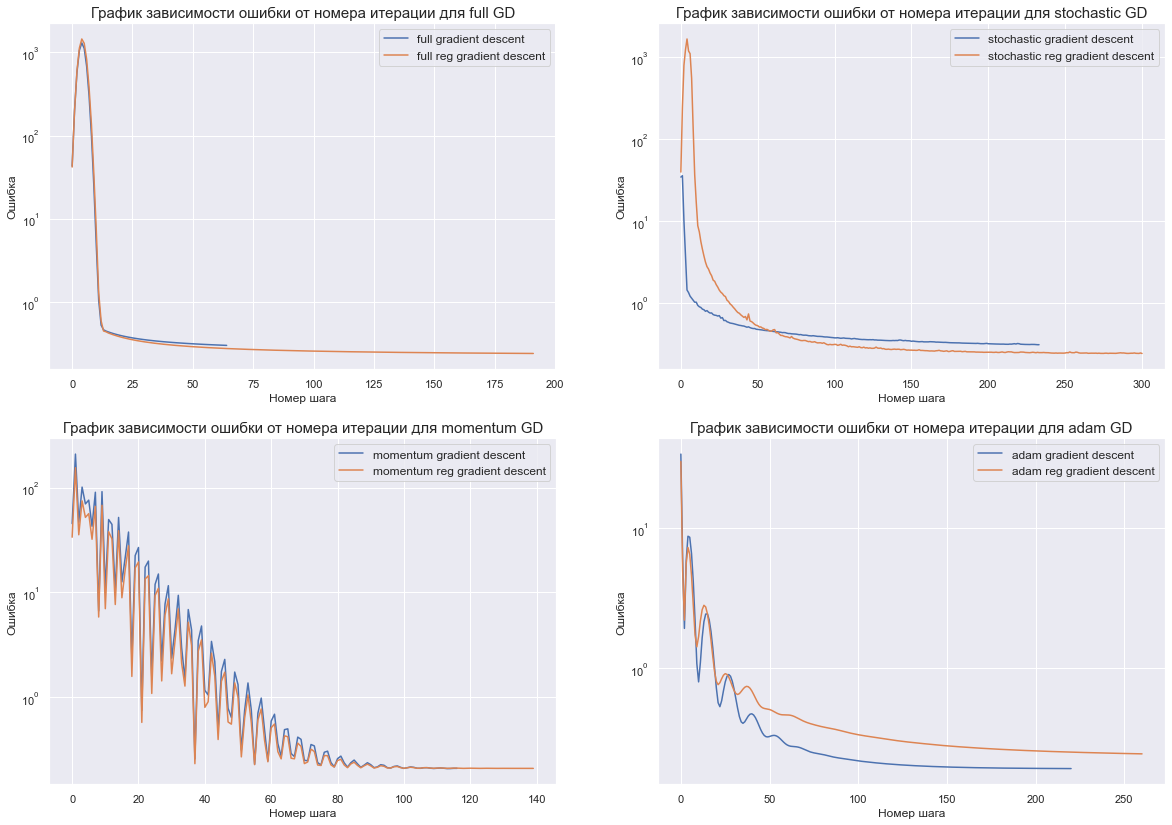

In [75]:
plt.figure(figsize = (20, 14))
for i in range(4):
    descent_config = {
        'descent_name': descents[i],
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambdas[i]
         }
    }
    descent_config_reg = {
        'descent_name': descents[i],
        'regularized': True,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambdas_reg[i],
             'mu': best_mus_reg[i]
         }
    }
    
    regression = LinearRegression(descent_config = descent_config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    regression_reg = LinearRegression(descent_config = descent_config_reg)
    regression_reg.fit(X_train.to_numpy(), y_train.to_numpy())
    
    plt.subplot(2, 2, i + 1)
    plt.plot(regression.loss_history, label = descents[i] + ' gradient descent')
    plt.plot(regression_reg.loss_history, label = descents[i] + ' reg gradient descent')
    plt.yscale('log')
    plt.legend(fontsize = 12)
    plt.title('График зависимости ошибки от номера итерации для ' + descents[i] + ' GD', fontsize = 15)
    plt.xlabel('Номер шага', fontsize = 12)
    plt.ylabel('Ошибка', fontsize = 12)
;

Начнем с количественных результатов: как мы видим практически для всех моделей качество (где-то сильно, где-то не очень) улучшилось. Исключением стал Adam (обидно на самом деле). Судя по всему, мы либо подобрали нехороший коэф. регуляризации, либо он и вовсе мешает модели хорошо обучаться и правильно подбирать веса. А вот обычному и стохастическому спуску он наоборот скорее помогает (наверное, там веса подбирались слишком большие и из-за этого спуск не сходился к минимальному значению). Для моментума же результат несильно улучшился, на самом деле это все равно хорошо, так как мы решаем проблему возможного переобучения и не теряем качество.

Графики на самом деле подтверждают численные результаты: почти везде желтенькая линия (спуск с регуляризацией) проходит пониже синенькой. Единственное, для стохастического спуска ошибка сначала растет сильнее, а потом очень быстро убывает и достигает минимума, ее график стал похож на обычный спуск. Ну и для Adam видно на графике, что новая кривая не доходит до минимума (опять же, скорее всего я накосячил и неправильно подобрал мю/лямбду), скорее всего результат должен был улучшиться, т.к. Adam - это такая прям база (цитата из семинара)

Ну в целом вывод такой - при правильно подобранном мю, регуляризация скорее помогает спуску сходиться к минимуму за счет того, что не дает сильно завышать веса. Единственное, нужно делать это аккуратно и следить, чтобы она не навредила (как в случае с Adam). Еще стоит заметить, что из-за того, что теперь мы сходимся к минимуму более плавно и качественно, вырастает и число итераций. Это может быть минусом, например для метода momentum, где качество улучшилось несильно

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

$$
\nabla_w Q(w) = 
    \frac{1}{\ell} \sum_{i = 1}^{\ell} \nabla_w q_i(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} \nabla_w (\log\left(\cosh(<x_i, w> - y_i)\right))
$$

$$
\nabla_w Q(w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}\frac{sinh(<x_i, w> - y_i)}{cosh(<x_i, w> - y_i)}x_i = \frac{1}{\ell}\sum_{i = 1}^{\ell}tanh(<x_i, w> - y_i)x_i
$$

На самом деле я не очень уверен, но вроде как в матричном виде это можно записать так:

$$
\nabla_w Q(w) = \frac{1}{\ell}tanh(Xw - y)^TX
$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

Как я понял, теперь нам не нужно строить всякие графики, мы просто подберем лямбду для каждого вида спуска, посчитаем R2 на тесте и сравним с качеством моделей из 5-го пункта. В целом код будет похожий на 5 пункт:

In [111]:
grid = np.logspace(-3, 0, 15) 
dimension = X_val.shape[1]
descents = ['full', 'stochastic', 'momentum', 'adam']  
r_squared_cosh = []          
best_lambdas_cosh = []

In [112]:
from descents import LossFunction

for descent in descents:
    losses = [] # для каждого спуска создаем список ошибок
    for lambda_ in grid:
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_, 'loss_function': LossFunction.LogCosh
            }
        }

        regression = LinearRegression(descent_config = descent_config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
        losses.append(current_loss)
        
    best_lambda = grid[np.array(losses).argmin()] # находим лямбду, которая соответствует минимальному лоссу
    best_lambdas_cosh.append(best_lambda)
    
    # теперь снова обучаем регрессию с лучшей лямбдой
    config = {
        'descent_name': descent,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda, 'loss_function': LossFunction.LogCosh
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    y_pred_cosh = regression.predict(X_test.to_numpy())
    r_squared_cosh.append(r2_score(y_test, y_pred_cosh))
    
# ждем всего лишь 2 минутки :)
# а не 20 как в прошлый раз

In [113]:
for i in range(4):
    print(f'R2 score для {descents[i]} GD: {r_squared_cosh[i]}')
    print('\n')

R2 score для full GD: 0.48160385626749336


R2 score для stochastic GD: 0.6263588380356284


R2 score для momentum GD: 0.7838225526074094


R2 score для adam GD: 0.8305803702726844




Тут результаты получились немного странные. Не могло качество упасть для некоторых спусков чуть ли не в 2 раза. А еще я увидел, что все оптимальные лямбды - это 1, поэтому я решил перебрать еще совсем немного лямбд побольше:

In [115]:
grid = np.logspace(0, 1, 5) 
dimension = X_val.shape[1]
descents = ['full', 'stochastic', 'momentum', 'adam']  
r_squared_cosh = []          
best_lambdas_cosh = []

In [116]:
from descents import LossFunction
for descent in descents:
    losses = [] # для каждого спуска создаем список ошибок
    for lambda_ in grid:
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_, 'loss_function': LossFunction.LogCosh
            }
        }

        regression = LinearRegression(descent_config = descent_config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
        losses.append(current_loss)
        
    best_lambda = grid[np.array(losses).argmin()] # находим лямбду, которая соответствует минимальному лоссу
    best_lambdas_cosh.append(best_lambda)
    
    # теперь снова обучаем регрессию с лучшей лямбдой
    config = {
        'descent_name': descent,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda, 'loss_function': LossFunction.LogCosh
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    y_pred_cosh = regression.predict(X_test.to_numpy())
    r_squared_cosh.append(r2_score(y_test, y_pred_cosh))
    
# ждем всего лишь 2 минутки :)
# а не 20 как в прошлый раз

In [117]:
for i in range(4):
    print(f'R2 score для {descents[i]} GD: {r_squared_cosh[i]}')
    print('\n')

R2 score для full GD: 0.7786970395126254


R2 score для stochastic GD: 0.789774071421887


R2 score для momentum GD: 0.8256855057047627


R2 score для adam GD: 0.8310616336627088




И уже видно, что качество для всех моделей стало лучше (если сравнивать с пятым пунктом). Если бы я перебрал еще какие-то лямбды, я уверен, что можно было бы еще повысить качество, просто не хочется ждать и еще у меня ноут греется :( Улучшение качества скорее всего связано с тем, что LogCosh более мягко обрабатывает выбросы и не так сильно под них подстраивается в отличие от MSE. Хоть мы и чистили данные от выбросов, все равно у некоторых признаков были некоторые большие значения с маленьким числом наблюдений. Я думаю поэтому веса подобрались получше

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

В общем я решил выбрать `AMSGrad`, т.к. про него есть хорошая статья вот [здесь](https://education.yandex.ru/handbook/ml/article/metody-optimizacii-v-deep-learning). Как я понял из этой статьи, в какой-то момент появились челики и сказали, что "при длительном процессе оптимизации Adam начинает сбоить" и предложили свое решение проблемы, которое заключается в том, чтобы выполнялось условие: $v_t >= v_{t-1}$
В данном случае наш алгоритм обновления весов будет выглядеть так:

\begin{align}
    &m_0 = 0, \quad v_0 = 0, \quad \widehat{v_0} = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} =  \max \left \{v_k, \widehat{v}_{k-1}\right\}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$

Как мы видим, обновился только способ подсчета $\widehat{v}$. Вообще мы теперь храним дополнительную переменную v_hat с предыдущего шага, и это вроде не круто с точки зрения хранения памяти, поэтому в статье приводится способ без дополнительного хранения, но я рассмотрю классический случай, как у авторов.

Еще один интересный момент: авторы метода в своей работе приводят подсчет без bias-correction, а в статье он есть и говорилось что это помогает, поэтому сначала я попробовал считать $\hat{v}$ так: 
$\dfrac{1}{1 - \beta_2^{k}} \max \left \{v_k, \widehat{v}_{k-1}\right\}$

Но там модель выдавала плохое качество, R2 вообще был отрицательный. Поэтому я решил считать все как в оригинальной работе, непонятно почему в статье говорилось, что bias-correction здесь улучшает сходимость

Теперь обучим модель таким видом спуска и  посмотрим на ее результаты:

In [144]:
# как обычно сначала подбираем лямбду
grid = np.logspace(-3, 1, 20)
losses_AMS = []

for lambda_ in grid:
    descent_config = {
        'descent_name': 'AMSGrad',
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config = descent_config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
    losses_AMS.append(loss)
    
best_lambda_AMS = grid[np.array(losses_AMS).argmin()]

# теперь обучаем модель с лучшей лямбдой
config = {
        'descent_name': 'AMSGrad',
        'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda_AMS
            }
        }
regression = LinearRegression(descent_config = config)
regression.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_AMS = regression.predict(X_test.to_numpy())
r2_AMS = r2_score(y_test, y_pred_AMS)

In [151]:
# как обычно сначала подбираем лямбду
grid = np.logspace(-3, 1, 20)
losses_AMS = []

for lambda_ in grid:
    descent_config = {
        'descent_name': 'AMSGrad',
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_
        }
    }
    regression = LinearRegression(descent_config = descent_config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
    losses_AMS.append(loss)
    
best_lambda_AMS = grid[np.array(losses_AMS).argmin()]

# теперь обучаем модель с лучшей лямбдой
config = {
        'descent_name': 'AMSGrad',
        'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda_AMS
            }
        }
regression = LinearRegression(descent_config = config)
regression.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_AMS = regression.predict(X_test.to_numpy())
r2_AMS = r2_score(y_test, y_pred_AMS)

In [152]:
print(f'R2 score для AMSGrad: {r2_AMS}')

R2 score для AMSGrad: 0.7509225834310134


Если сравнивать с результатами для функцией потерь MSE, то AMSGrad показал себя средненько. Качество хуже чем для моментума и Adam, но зато получше чем для обычного и стохастического спуска. Если же сравнивать с другими методами, обученными на функции потерь LogCosh, то тут метод хуже даже обычного спуска. В целом я думаю эксперимент не удался, так как метод показывает себя хуже чем Adam, хотя должен был улучшить его результат. Возможно, результат мог бы улучшиться в какой-то конкретной задаче при определенных условиях, но не в нашей

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

Сначала найдем градиент для **MAE**:

$$
\nabla_w Q(w) = 
    \frac{1}{\ell} \sum_{i = 1}^{\ell} \nabla_w q_i(w) =  \frac{1}{\ell} \sum_{i = 1}^{\ell} \nabla_w |<x_i, w> - y_i|
$$

Используя формулу для производной сложной функции:
$$
\nabla_w Q(w) = 
    \frac{1}{\ell} \sum_{i = 1}^{\ell} sign(<x_i, w>- y_i)x_i
$$

В матричном виде эту сумму можно записать так:

$$
\nabla_w Q(w) = \frac{1}{\ell}X^Tsign(Xw - y)
$$

Для **Huber Loss** все довольно просто. Если отклонение прогноза по модулю от таргета больше некоторого значения, то мы считаем MAE, а если меньше - MSE:

$$
q_i(w) =  \dfrac{1}{2}(<x_i,w> - y_i)^2, если |<x_i,w> - y_i| < \delta
$$

$$
q_i(w) =  \delta (|x_iw - y_i| - \dfrac{1}{2}\delta), если |<x_i,w> - y_i| >= \delta
$$

Считаем градиент на отдельном объекте:
$$
\nabla_w^{MSE} q_i(w) = (<x_i,w> - y_i)x_i,  если |<x_i,w> - y_i| < \delta
$$

$$
\nabla_w^{MAE} q_i(w) = \delta sign(<x_i,w> - y_i)x_i, если |<x_i,w> - y_i| >= \delta
$$

Теперь общий градиент:
$$
\nabla_w Q(w) = \sum_{i = 1}^{\ell} \nabla_w^{MSE}q_i(w)[|<x_i,w> - y_i| < \delta] + \sum_{i = 1}^{\ell} \nabla_w^{MAE}q_i(w)[|<x_i,w> - y_i| >= \delta]
$$

Немного коряво я записал, но в общем суть такая, что для каждого объекта мы сравниваем отклонение с дельтой и в зависимости от того, что больше считаем ошибку MSE или MAE, а потом просто все суммируем (в формуле то, что в квадратных скобках - это индикатор, ну да решил выпендриться)

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

Сначала давайте попробуем определиться с дельтой. Если взглянуть на гистограмку, то можно заметить, что большая часть значений сконцентрирована в диапазоне 7 - 9.5. Ну давайте например скажем, что отклонения больше чем в +- 2 мы не хотим сильно штрафовать (не так много таких наблюдений), и на них мы будем считать MAE, а на остальных MSE. То есть дельта = 2.

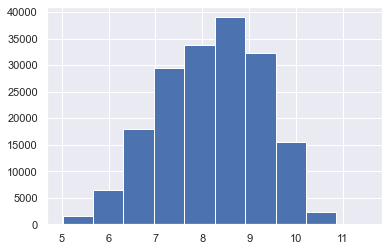

In [159]:
y_train.hist();

Подбирем параметр лямбда для новых функций потерь и посчитаем качество. Сначала для **MAE**:

In [163]:
grid = np.logspace(-3, 0, 15) 
dimension = X_val.shape[1]
descents = ['full', 'stochastic', 'momentum', 'adam']  
r_squared_mae = []          
best_lambdas_mae = []

In [164]:
from descents import LossFunction

for descent in descents:
    losses = [] # для каждого спуска создаем список ошибок
    for lambda_ in grid:
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_, 'loss_function': LossFunction.MAE
            }
        }

        regression = LinearRegression(descent_config = descent_config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
        losses.append(current_loss)
        
    best_lambda = grid[np.array(losses).argmin()] # находим лямбду, которая соответствует минимальному лоссу
    best_lambdas_mae.append(best_lambda)
    
    # теперь снова обучаем регрессию с лучшей лямбдой
    config = {
        'descent_name': descent,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda, 'loss_function': LossFunction.MAE
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    y_pred_mae = regression.predict(X_test.to_numpy())
    r_squared_mae.append(r2_score(y_test, y_pred_mae))

In [165]:
for i in range(4):
    print(f'R2 score для {descents[i]} GD MAE: {r_squared_mae[i]}')
    print('\n')

R2 score для full GD MAE: 0.6293750365409709


R2 score для stochastic GD MAE: 0.7302572554960249


R2 score для momentum GD MAE: 0.8008217771084414


R2 score для adam GD MAE: 0.8266313896855771




Теперь для **Huber**:

In [166]:
grid = np.logspace(-3, 0, 15) 
dimension = X_val.shape[1]
descents = ['full', 'stochastic', 'momentum', 'adam']  
r_squared_huber = []          
best_lambdas_huber = []

In [209]:
from descents import LossFunction

for descent in tqdm(descents):
    losses = [] # для каждого спуска создаем список ошибок
    for lambda_ in grid:
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambda_, 'loss_function': LossFunction.Huber
            }
        }

        regression = LinearRegression(descent_config = descent_config)
        regression.fit(X_train.to_numpy(), y_train.to_numpy())
        current_loss = regression.calc_loss(X_val.to_numpy(), y_val.to_numpy())
        losses.append(current_loss)
        
    best_lambda = grid[np.array(losses).argmin()] # находим лямбду, которая соответствует минимальному лоссу
    best_lambdas_huber.append(best_lambda)
    
    # теперь снова обучаем регрессию с лучшей лямбдой
    config = {
        'descent_name': descent,
         'kwargs': {
            'dimension': dimension,
            'lambda_': best_lambda, 'loss_function': LossFunction.Huber
         }
    }
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train.to_numpy(), y_train.to_numpy())
    
    # и считаем все что нам нужно
    y_pred_huber = regression.predict(X_test.to_numpy())
    r_squared_huber.append(r2_score(y_test, y_pred_huber))

100%|████████████████████████████████████████████| 4/4 [26:44<00:00, 401.15s/it]


In [210]:
for i in range(4):
    print(f'R2 score для {descents[i]} GD Huber: {r_squared_huber[i]}')
    print('\n')

R2 score для full GD Huber: 0.6267730875600224


R2 score для stochastic GD Huber: 0.7045112424432014


R2 score для momentum GD Huber: 0.6264967075371998


R2 score для adam GD Huber: 0.7149320218495439




Теперь для каждого вида спуска сравним результаты:

Почти все виды спусков показывают лучшее качество с функцией потерь LogCosh. Только обычный градиентный спуск работает лучше с MSE и регуляризацией. 

Стоит признать, что Huber Loss тут провалился, хотя по сути, LogCosh и Huber должны давать примерно одинаковые результаты, так как они основаны на одной идее. Возможно, я неправильно подобрал дельту, или надо было так же как и с LogCosh перебрать побольше лямбд. Но код работает слишком долго, всего 15 лямбд перебирались 25 минут, такое себе удовольствие. 

А вот MAE например показывает неплохие результаты с Momentum. Для моментума это второй по качеству результат после LogCosh. Так что тут нет такого провала как с Huber Loss

Так что если выбирать лучшую функцию потерь, я бы сказал, что это LogCosh, как минимум потому что самые сильные методы (Adam и Momentum) здесь показывают лучшее качество.